In [1]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

we can observe that the TotalCharges has continuous data but it is an object type.Let us handle this column.

In [10]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [14]:
df.loc[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


After some observation we saw that some column have the space as the value.

In [17]:
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan)

In [18]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

converting the column type from object to float

In [19]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

now we can see total charges columns have some space values which is replaced by nan values.Now we will handle the nan values.

Handling the nan values and replacing it with the mean of the column.As the column is continued in nature.

In [21]:
df['TotalCharges'] = df['TotalCharges'].fillna(np.mean(df['TotalCharges']))

In [22]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [24]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Making DataFrame for Nominal data

In [30]:
df_visualization_nominal = df[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']].copy()

In [31]:
df_visualization_nominal.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

## Visualization of the data.

For the nominal categorical data we will use countplot as it will give the frequency of the classes of the columna.

In [32]:
import seaborn as sns

Male      3555
Female    3488
Name: gender, dtype: int64


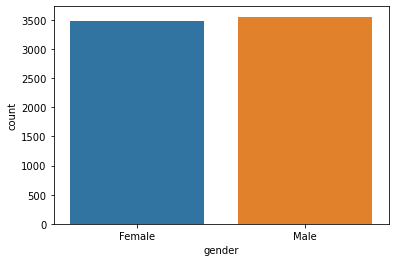

In [33]:
ax = sns.countplot(x = 'gender',data = df_visualization_nominal)
print(df_visualization_nominal['gender'].value_counts())

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


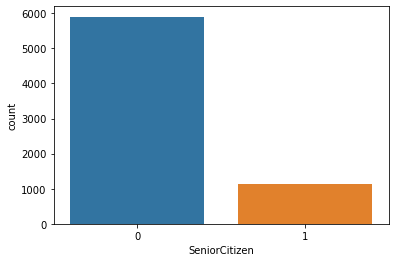

In [34]:
ax = sns.countplot(x = 'SeniorCitizen',data = df_visualization_nominal)
print(df_visualization_nominal['SeniorCitizen'].value_counts())

No     3641
Yes    3402
Name: Partner, dtype: int64


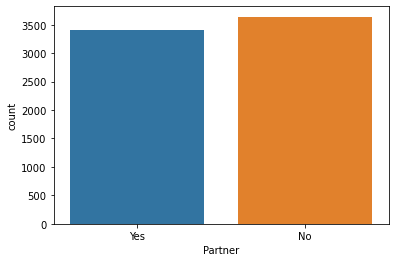

In [35]:
ax = sns.countplot(x = 'Partner',data = df_visualization_nominal)
print(df_visualization_nominal['Partner'].value_counts())

No     4933
Yes    2110
Name: Dependents, dtype: int64


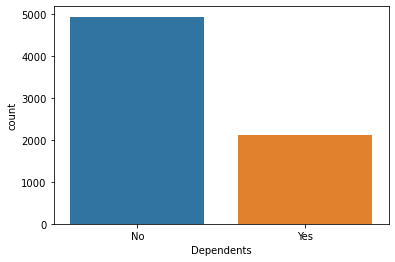

In [36]:
ax = sns.countplot(x = 'Dependents',data = df_visualization_nominal)
print(df_visualization_nominal['Dependents'].value_counts())

From the above observation the total number of dependent customer is 2110 and total number of independent customer is 4933

Yes    6361
No      682
Name: PhoneService, dtype: int64


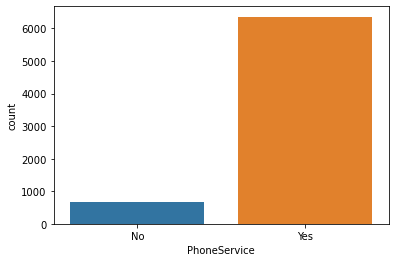

In [37]:
ax = sns.countplot(x = 'PhoneService',data = df_visualization_nominal)
print(df_visualization_nominal['PhoneService'].value_counts())

From the above observation the total number of customer using phoneservice is 6361 and total number of customer not using phoneservice is 682

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


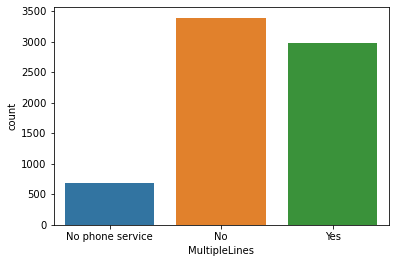

In [38]:
ax = sns.countplot(x = 'MultipleLines',data = df_visualization_nominal)
print(df_visualization_nominal['MultipleLines'].value_counts())

From the above observation the total number of customer not using any phoneservice is 682,using no multiple service is 3390 and using multiple service is 2971

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


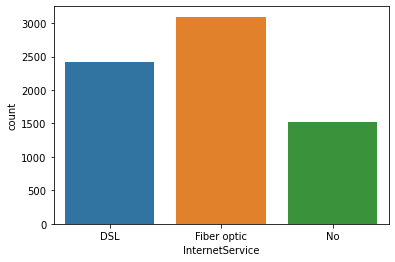

In [40]:
ax = sns.countplot(x = 'InternetService',data = df_visualization_nominal)
print(df_visualization_nominal['InternetService'].value_counts())

From the above observation the total number of customer not using not using any InternetService is 1526,fibre optics internet service is  3096 and using DSL internetservice is 2421

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


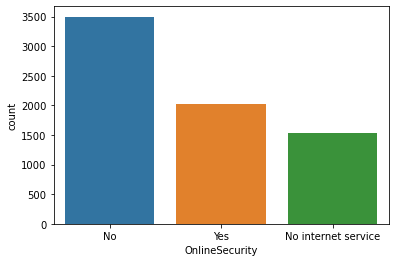

In [42]:
ax = sns.countplot(x = 'OnlineSecurity',data = df_visualization_nominal)
print(df_visualization_nominal['OnlineSecurity'].value_counts())

From the above observation the total number of customer not using not using any InternetService is 1526,using onlinesecurity is 2019 and not using onlinesecurity service is 3498

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


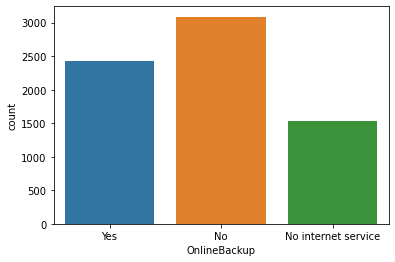

In [43]:
ax = sns.countplot(x = 'OnlineBackup',data = df_visualization_nominal)
print(df_visualization_nominal['OnlineBackup'].value_counts())

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


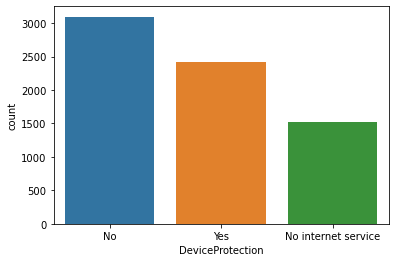

In [44]:
ax = sns.countplot(x = 'DeviceProtection',data = df_visualization_nominal)
print(df_visualization_nominal['DeviceProtection'].value_counts())

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


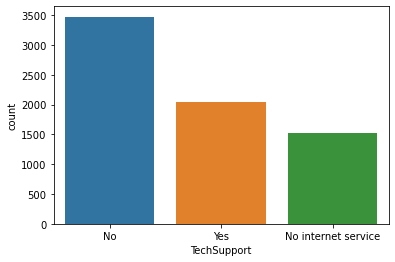

In [45]:
ax = sns.countplot(x = 'TechSupport',data = df_visualization_nominal)
print(df_visualization_nominal['TechSupport'].value_counts())

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


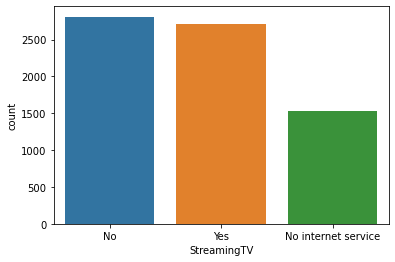

In [46]:
ax = sns.countplot(x = 'StreamingTV',data = df_visualization_nominal)
print(df_visualization_nominal['StreamingTV'].value_counts())

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


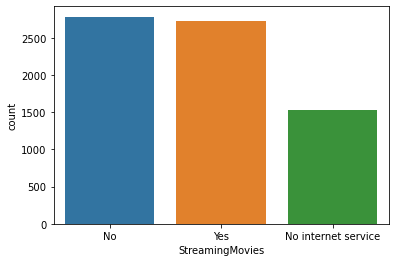

In [48]:
ax = sns.countplot(x = 'StreamingMovies',data = df_visualization_nominal)
print(df_visualization_nominal['StreamingMovies'].value_counts())

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


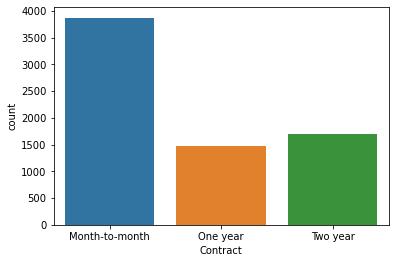

In [49]:
ax = sns.countplot(x = 'Contract',data = df_visualization_nominal)
print(df_visualization_nominal['Contract'].value_counts())

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


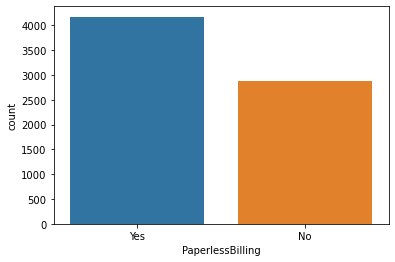

In [50]:
ax = sns.countplot(x = 'PaperlessBilling',data = df_visualization_nominal)
print(df_visualization_nominal['PaperlessBilling'].value_counts())

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


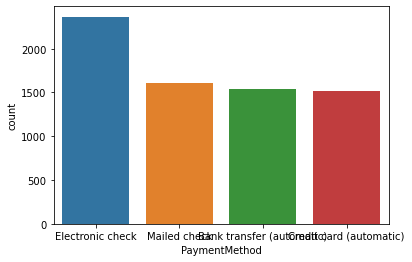

In [51]:
ax = sns.countplot(x = 'PaymentMethod',data = df_visualization_nominal)
print(df_visualization_nominal['PaymentMethod'].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


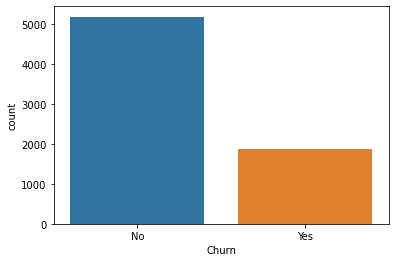

In [52]:
ax = sns.countplot(x = 'Churn',data = df_visualization_nominal)
print(df_visualization_nominal['Churn'].value_counts())

For the ordinal categorical data we will use lineplot as it will give the flow of the line of the xlasses of the columns.

## Making dataframe for the ordinal data

In [53]:
df_visualiztion_ordinal = df[['customerID','tenure']].copy()

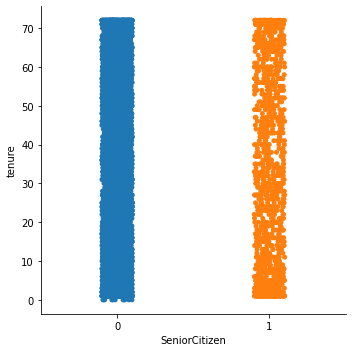

In [54]:
sns.catplot(x = 'SeniorCitizen',y = 'tenure',data = df)

Checking the distibution of the continuous value of the float type columns.

In [56]:
df_visualization_continuous = df[['MonthlyCharges','TotalCharges']].copy()


<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

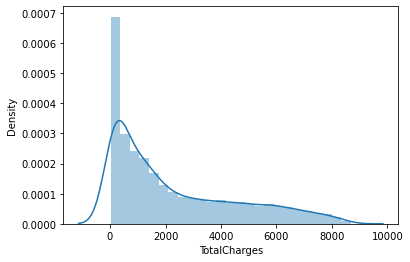

In [59]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.distplot(df_visualization_continuous['TotalCharges'],kde = True)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

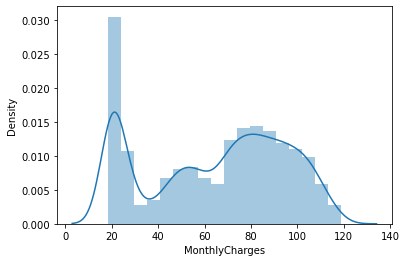

In [60]:
sns.distplot(df_visualization_continuous['MonthlyCharges'],kde = True)


Visualization part is completed.

#### Since the dataset has a lot of string value.WE will use the encoding techniques to convert the string data to numerical one.

## Encoding of DataFrame

In [61]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [63]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = oe.fit_transform(df[i].values.reshape(-1,1))

In [64]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [65]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


<AxesSubplot:>

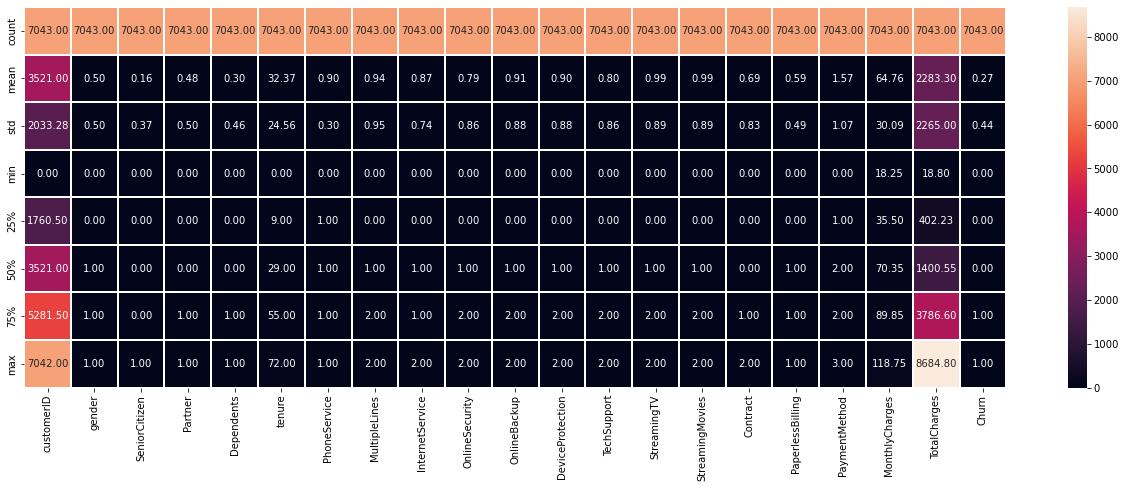

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize = (22,7))
sns.heatmap(df.describe(),annot = True,linewidths = 0.1,fmt = '0.2f')

correlation of columns with the target columns.

In [69]:
df.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,-0.000270,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309


<AxesSubplot:>

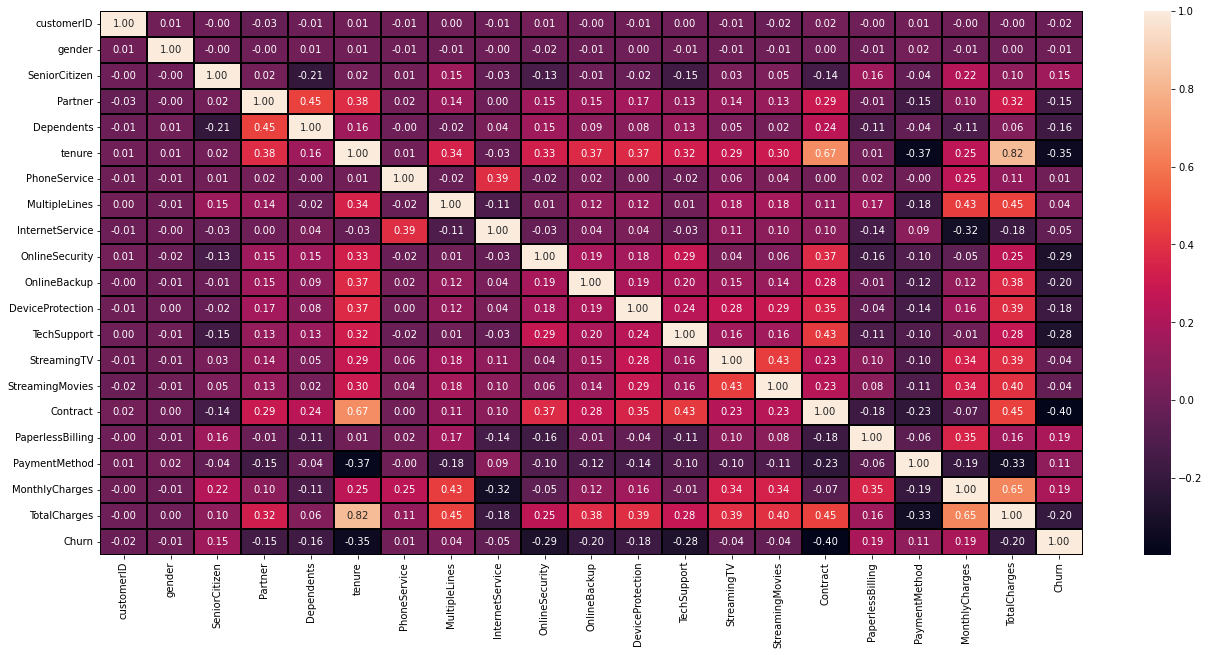

In [71]:
plt.figure(figsize = (22,10))
sns.heatmap(df.corr(),annot = True,linewidths = 0.1,linecolor = 'black',fmt = '0.2f')

Checking the columns which are negatively and positively correlated with the target columns.

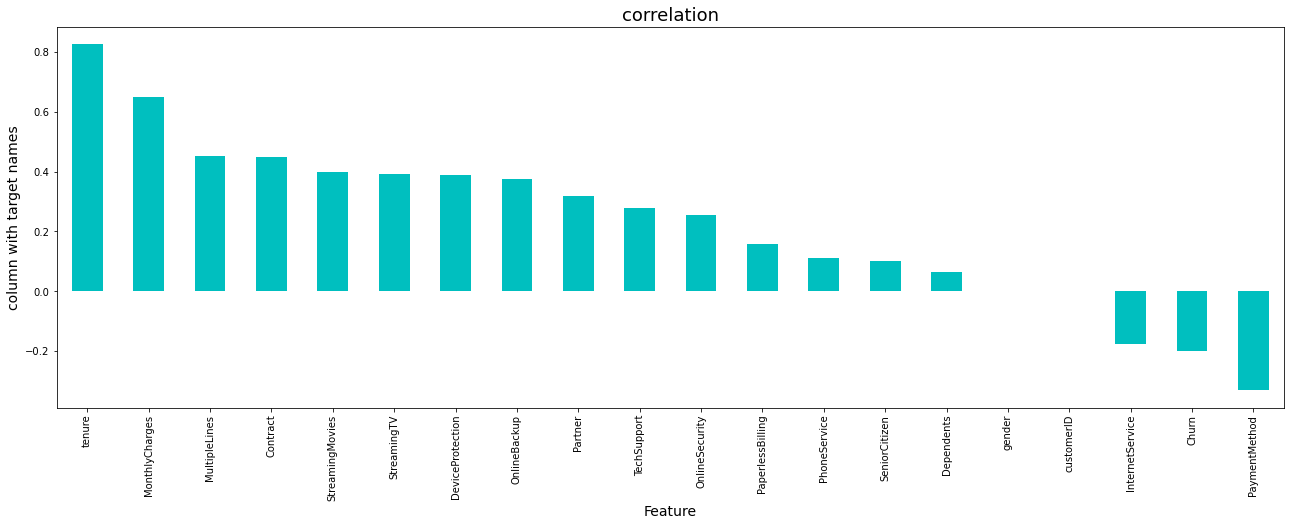

In [73]:
plt.figure(figsize = (22,7))
df.corr()['TotalCharges'].sort_values(ascending = False).drop(['TotalCharges']).plot(kind = 'bar',color = 'c')
plt.xlabel('Feature',fontsize = 14)
plt.ylabel('column with target names',fontsize = 14)
plt.title('correlation',fontsize = 18)
plt.show()

In [74]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

keeping +/-0.5 as the range of skewness,here are the columns which doesnot lie within this range.
senior citizen
Dependent
phoneservice
contract
Totalcharges
churn

Since no column has skewness,we will not treat that.

## Outliers check.

In [77]:
df.dtypes

customerID          float64
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

checking the outliers  on the int and float type of columns.

<AxesSubplot:>

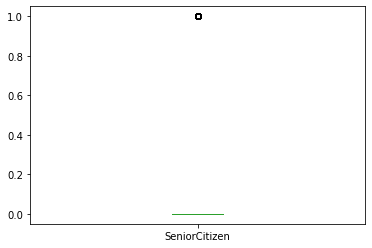

In [78]:
df['SeniorCitizen'].plot.box()

<AxesSubplot:>

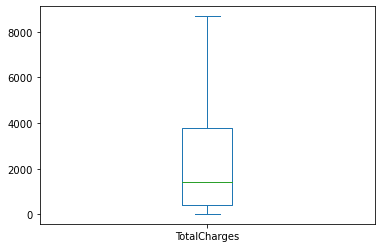

In [79]:
df['TotalCharges'].plot.box()

<AxesSubplot:>

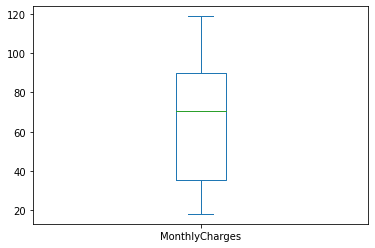

In [80]:
df['MonthlyCharges'].plot.box()

<AxesSubplot:>

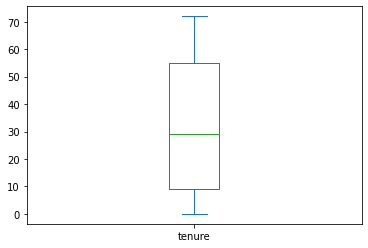

In [81]:
df['tenure'].plot.box()

In [83]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

since seniorcitizen is a nominal type we cannot consider it data point as outlier.

### Considering the outlier removal

In [84]:
df.shape

(7043, 21)

In [85]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
threshold = 3
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [86]:
df_new_z = df[(z<3).all(axis = 1)]
df_new_z

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
5,6551.0,0.0,0,0.0,0.0,8,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,0.0,1.0,2.0,99.65,820.50,1.0
6,1002.0,1.0,0,0.0,1.0,22,1.0,2.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,1.0,1.0,89.10,1949.40,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1758.0,0.0,0,0.0,0.0,72,1.0,0.0,2.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,0.0,21.15,1419.40,0.0
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [87]:
df_new_z.shape

(6361, 21)

In [88]:
## Percentage loss of data.

In [89]:
Data_loss = ((7043-6361)/7043)*100

In [90]:
Data_loss

9.683373562402386

Our data is becoming biased as it is not considering the case of seniorcitizen.Thus we will not remove outliers

#### Seperating the columns into features and columns

In [91]:
features = df.drop(['TotalCharges'],axis = 1)
target = df['TotalCharges']

#### Scaling the data using Min_Max Scaler

In [92]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [96]:
for i in range(1,100):
    features_train,features_test,target_train,target_test = train_test_split(features,target,test_size = 0.25,random_state = i)
    lr.fit(features_train,target_train)
    pred_train = lr.predict(features_train)
    pred_test = lr.predict(features_test)
    print(f'At random state {i},the training accuracy score is:- {r2_score(target_train,pred_train)}')
    print(f'At random state {i},the testing accuracy score is:- {r2_score(target_test,pred_test)}')
    print('\n')

At random state 1,the training accuracy score is:- 0.904917184339662
At random state 1,the testing accuracy score is:- 0.9019063325679917


At random state 2,the training accuracy score is:- 0.9057011726740728
At random state 2,the testing accuracy score is:- 0.8996995563633459


At random state 3,the training accuracy score is:- 0.9047450325782641
At random state 3,the testing accuracy score is:- 0.9026489843969138


At random state 4,the training accuracy score is:- 0.9032507096275094
At random state 4,the testing accuracy score is:- 0.907131568077683


At random state 5,the training accuracy score is:- 0.9030657548671235
At random state 5,the testing accuracy score is:- 0.9074857395695944


At random state 6,the training accuracy score is:- 0.9026194473123603
At random state 6,the testing accuracy score is:- 0.9091462233469572


At random state 7,the training accuracy score is:- 0.9037696299042223
At random state 7,the testing accuracy score is:- 0.9058238946947826


At random state

At random state 64,the training accuracy score is:- 0.9040120780053463
At random state 64,the testing accuracy score is:- 0.904794691305958


At random state 65,the training accuracy score is:- 0.9045784942953339
At random state 65,the testing accuracy score is:- 0.9030985914247246


At random state 66,the training accuracy score is:- 0.906315908020218
At random state 66,the testing accuracy score is:- 0.8978936637627457


At random state 67,the training accuracy score is:- 0.9052909394914777
At random state 67,the testing accuracy score is:- 0.9011932188597642


At random state 68,the training accuracy score is:- 0.9051906456884201
At random state 68,the testing accuracy score is:- 0.9015790967747475


At random state 69,the training accuracy score is:- 0.9035969984223979
At random state 69,the testing accuracy score is:- 0.906194326198883


At random state 70,the training accuracy score is:- 0.9051673635605528
At random state 70,the testing accuracy score is:- 0.9012616923964382


At

In [99]:
features_train,features_test,target_train,target_test = train_test_split(features,target,test_size = 0.25,random_state = 12)

In [100]:
lr.fit(features_train,target_train)

LinearRegression()

In [101]:
pred_test = lr.predict(features_test)

In [102]:
print(r2_score(target_test,pred_test))

0.9026735048179821


#### Cross validation of the model

In [103]:
Train_accuracy = r2_score(target_train,pred_train)
Test_accuracy = r2_score(target_test,pred_test)
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score = cross_val_score(lr,features,target,cv = i)
    cv_mean = cv_score.mean()
    print(f'At cross fold {i} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for testing is {Test_accuracy}')


At cross fold 2 the cv score is 0.9033382537767014 and accuracy score for training is -0.888751636261573 and accuracy for testing is 0.9026735048179821
At cross fold 3 the cv score is 0.9037012261875316 and accuracy score for training is -0.888751636261573 and accuracy for testing is 0.9026735048179821
At cross fold 4 the cv score is 0.9037044584134893 and accuracy score for training is -0.888751636261573 and accuracy for testing is 0.9026735048179821
At cross fold 5 the cv score is 0.9036665825623267 and accuracy score for training is -0.888751636261573 and accuracy for testing is 0.9026735048179821
At cross fold 6 the cv score is 0.903734902438936 and accuracy score for training is -0.888751636261573 and accuracy for testing is 0.9026735048179821
At cross fold 7 the cv score is 0.9035677539347997 and accuracy score for training is -0.888751636261573 and accuracy for testing is 0.9026735048179821
At cross fold 8 the cv score is 0.9035565941557735 and accuracy score for training is -0.

Since the number of folds donot have such impact on the accuracy and cv_score so cv = 5 is selected.

Here we have handled the problem of overfitting and underfitting by checking the training and testing score.